# Solution of Homework 01 - Plus Problem 01

In this notebook, we'll implement the solution to Homework 01, Plus Problem 01. You could have written your response in whatever language you like, but I'll be using Python.

First we need to get the data. For that, we'll use `pandas` and the handy `.read_csv()` function. It can even accept a URL:

In [1]:
import pandas as pd

In [2]:
train = pd.read_csv('http://cse151a.com/data/nba/train.csv')
train

,Name,Position,Height,Weight
0,Anthony Tolliver,Forward,80,240
1,Arnett Moultrie,Forward,83,230
2,Cory Joseph,Guard,75,185
3,Chauncey Billups,Guard,75,202
4,Russell Westbrook,Guard,75,187
...,...,...,...,...
295,Deron Williams,Guard,75,209
296,Jae Crowder,Forward,79,240
297,Chuck Hayes,Forward,78,238
298,Stephen Curry,Guard,75,185


In [3]:
test = pd.read_csv('http://cse151a.com/data/nba/test.csv')

## Part A) Without standardization

In the first part, we're asked to find the test error when we apply the 1-nearest neighbor rule without standardizing the data.

To make things easier, let's extract the data and the labels from `train`:

In [4]:
train_X = train[['Height', 'Weight']]
train_X

,Height,Weight
0,80,240
1,83,230
2,75,185
3,75,202
4,75,187
...,...,...
295,75,209
296,79,240
297,78,238
298,75,185


In [5]:
train_y = train['Position']
train_y

0      Forward
1      Forward
2        Guard
3        Guard
4        Guard
        ...   
295      Guard
296    Forward
297    Forward
298      Guard
299    Forward
Name: Position, Length: 300, dtype: object

And we'll do the same for the test set:

In [6]:
test_X = test[['Height', 'Weight']]
test_y = test['Position']

Our goal is to write a function which takes in a point (and a training set) and returns the label of the point's nearest neighbor in the training set. It isn't too hard to write some code to compute distances, but lets use `scipy.spatial.distance_matrix`; it takes in an $m \times k$ matrix and an $n \times k$ matrix and returns an $m \times n$ matrix whose $(i,j)$ entry is the distance between row $i$ of the first matrix and row $j$ of the second.

In [7]:
import scipy.spatial

In [8]:
distances = scipy.spatial.distance_matrix(test_X, train_X)
distances

array([[60.40695324, 50.99019514,  5.38516481, ..., 58.21511831,
         5.38516481, 70.57619995],
       [ 2.        , 10.04987562, 55.4436651 , ...,  4.47213595,
        55.4436651 , 10.        ],
       [32.24903099, 23.08679276, 23.02172887, ..., 30.06659276,
        23.02172887, 42.42640687],
       ...,
       [20.02498439, 30.2654919 , 75.10659092, ..., 22.02271555,
        75.10659092, 10.44030651],
       [ 5.        ,  5.83095189, 50.24937811, ...,  3.60555128,
        50.24937811, 15.13274595],
       [44.28317965, 34.92849839, 11.        , ..., 42.10700654,
        11.        , 54.45181356]])

In [9]:
distances.shape

(113, 300)

The $i$th row of the above matrix contains the distance from the $i$th test point to all of the training points. We want to find the closest training point. We can do this with `np.argmin`, which returns the *index* of the smallest thing in a list.

In [10]:
import numpy as np

In [11]:
nearest_ix = np.argmin(distances, axis=1)
nearest_ix

array([ 80,   8,  11, 232,   0, 136, 248, 292,  77,  50, 228,  19, 221,
        83,  31,  80, 203,  83, 270, 228, 183,  56,  40,  17,  14,  49,
        22,  42, 103, 108, 153,  80, 132, 243, 141,  40,  80, 139, 292,
        46, 169, 227,  47, 281,   2,  73,  40, 214,  21, 165,  80, 243,
        20,  14, 221,  38, 159, 196,  62,  81,  80,  64, 103,   7,  21,
        91, 209, 103, 158,  20,  96,  45,  32,  50,  10, 131,  14, 175,
        56, 197,  20, 106,   5, 233, 138,   8,  40,  82,  78,  40, 131,
       243,  82,  64, 131,  51, 127,  50,  78, 181, 132,   9,  92, 229,
        37,  17,  32, 169,  56, 103, 135,  19, 205])

These are the indices of the smallest element of each row. That is, the smallest element in the first row occurs in the 80th column; the smallest element in the second row is in the 8th column, and so on. This means that the closest training point to the first test point is training point #80. And the training point closest to the second test point is training point #8.

We can recover the labels of these training points by indexing into `train_y` with `nearest_ix`:

In [12]:
predictions = train_y[nearest_ix]
predictions

80       Guard
8      Forward
11       Guard
232      Guard
0      Forward
        ...   
56     Forward
103    Forward
135    Forward
19       Guard
205      Guard
Name: Position, Length: 113, dtype: object

Let's see where it worked:

In [13]:
predictions

80       Guard
8      Forward
11       Guard
232      Guard
0      Forward
        ...   
56     Forward
103    Forward
135    Forward
19       Guard
205      Guard
Name: Position, Length: 113, dtype: object

In [14]:
predictions.values == test_y.values

array([ True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True, False,
        True,  True,  True, False,  True, False,  True,  True, False,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True, False, False,  True, False,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True, False,  True])

What's the test accuracy?

In [15]:
(predictions.values == test_y.values).mean()

0.8407079646017699

### Checking with `sklearn`

We can check this answer with `sklearn`, a python package containing machine learning algorithms.

In [16]:
import sklearn.neighbors

knn = sklearn.neighbors.KNeighborsClassifier(n_neighbors=1)
knn.fit(train_X, train_y)
knn.score(test_X, test_y)

0.8938053097345132

It looks like `sklearn` got different results. Is our code wrong?

No, not necessarily. The issue is that since the heights and weights are rounded to the nearest whole number, it is often the case that there are *multiple* nearest neighbors. And if these nearest neighbors have different labels, it is essentially arbitrary which label our classifier picks (a natural extension in the case of "ties" like this is to have the nearest neighbors vote, but we have not implemented this). The `sklearn` implementation might break ties differently than our implementation, thus the difference.

We can verify that the nearest neighbors aren't unique by sorting each row of the distance matrix from smallest to largest:

In [17]:
distances.sort(axis=1)
distances

array([[  1.        ,   1.        ,   1.        , ...,  86.37129153,
         90.19977827, 109.29318368],
       [  0.        ,   0.        ,   0.        , ...,  79.63039621,
         80.62257748,  83.72574276],
       [  1.        ,   1.        ,   1.41421356, ...,  58.21511831,
         62.07253821,  81.15417426],
       ...,
       [  0.        ,   1.        ,   2.        , ...,  99.24716621,
        100.24470061, 103.31021247],
       [  0.        ,   0.        ,   1.        , ...,  74.43117626,
         75.42545989,  78.51751397],
       [  1.        ,   1.        ,   1.        , ...,  70.25667228,
         74.10802925,  93.1933474 ]])

See how the first test point has (at least) three nearest neighbors, all within distance one?

If you're still skeptical, try going back and adding some small random noise to the training set so as to break any ties. You'll find that `sklearn` and our code give *exactly* the same predictions.

## With standardization

Now let's try standardizing each feature before applying the nearest neighbor classification rule. The procedure is as follows: compute the mean and standard deviation of each feature (i.e., each column of the training data matrix, `train_X`). Subtract each's column's mean from each number in that column, and divide each by the column's standard deviation. Do this for both the train and test set; when working with the test set, use the statistics (mean and STD) from the train set.

In [18]:
mu = train_X.mean(axis=0)
mu

Height     78.113333
Weight    213.663333
dtype: float64

In [19]:
sigma = train_X.std(axis=0)
sigma

Height     3.204380
Weight    24.178613
dtype: float64

I'll call the result `train_Z`, since the variables are "z-scored".

In [20]:
train_Z = (train_X - mu) / sigma
train_Z

,Height,Weight
0,0.588778,1.089255
1,1.524996,0.675666
2,-0.971587,-1.185483
3,-0.971587,-0.482382
4,-0.971587,-1.102765
...,...,...
295,-0.971587,-0.192870
296,0.276705,1.089255
297,-0.035368,1.006537
298,-0.971587,-1.185483


In [21]:
test_Z = (test_X - mu) / sigma

Now we run the 1nn classifier as we did above:

In [22]:
distances = scipy.spatial.distance_matrix(test_Z, train_Z)
distances

array([[3.30606795, 3.74370641, 0.65751185, ..., 2.86165101, 0.65751185,
        4.03364242],
       [0.62414577, 0.51811683, 3.15380972, ..., 1.25102916, 3.15380972,
        0.41358865],
       [1.81929678, 2.36643058, 1.00113608, ..., 1.38890535, 1.00113608,
        2.55410291],
       ...,
       [0.8840881 , 1.76003747, 3.34366679, ..., 0.96192435, 3.34366679,
        1.02350424],
       [0.20679432, 0.9587853 , 2.59058417, ..., 0.63635913, 2.59058417,
        0.88001873],
       [2.39715935, 2.86536723, 0.45494751, ..., 1.97330323, 0.45494751,
        3.1241103 ]])

In [23]:
nearest_ix = np.argmin(distances, axis=1)
nearest_ix

array([ 89,   8, 223, 232,   0, 136, 248, 292,  77,  50, 228,  19, 221,
        83, 106,  80, 100,  83, 270, 228, 183,  56,  40,  17,  14,  49,
        30, 209, 103, 108,  62,  80, 132, 250, 141,  40,  80, 139, 292,
        46, 169, 227,  47, 281,   2,  73,  40, 214,  21, 165,  89, 243,
        20,  14, 221,  38, 159, 196,  62,  95,  80,  37, 103,   7,  21,
        91, 209, 103, 158,  20,  39, 110,  32,  50, 248,  63, 270, 175,
        56, 197,  20, 106,  60, 233, 138,   8,  40,  82, 137,  40,   6,
       250,  82,  37,   6,  51, 212,  50,  78, 181, 132,   9, 106, 229,
       196, 237,  32, 169,  56, 103, 135,  19, 205])

In [24]:
predictions_Z = train_y[nearest_ix]

In [25]:
(predictions_Z.values == test_y).mean()

0.8230088495575221

## Analysis

Our test error actually *increased* after standardization. Why is this? Let's plot the errors that are made when we don't standardize.

In [26]:
import matplotlib.pyplot as plt

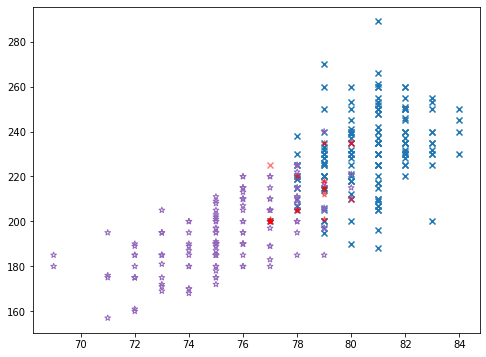

In [27]:
plt.figure(figsize=(8,6))

plt.scatter(*train_X[train_y == 'Forward'].values.T, color='C0', marker='x')
plt.scatter(*train_X[train_y == 'Guard'].values.T, color='C4', facecolor='None', marker='*')
plt.scatter(*test_X[(test_y.values != predictions.values) & (test_y == 'Forward')].values.T, color='red', marker='x', alpha=.5)
plt.scatter(*test_X[(test_y.values != predictions.values) & (test_y == 'Guard')].values.T, color='red', marker='*', alpha=.5)

The purple stars are the guards in the training set, while the blue x's are the forwards. The red points are the misclassified test points, and their shape tells you whether the point is actually a forward or a guard. So, for instance, a red x should have been classified as a forward, but was actually classified as a guard.

What we see, somewhat surprisingly, is there are only a few mistakes -- the classifier works pretty well, even without standardization. If you think about how the classifier is making its decisions, this makes some sense. Remember that the plot above is somewhat misleading, because the two axes are on two very different scales. That is, we draw a circle of radius 4, it looks very squashed:

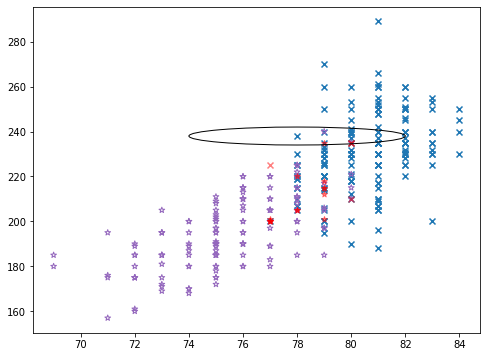

In [28]:
plt.figure(figsize=(8,6))


plt.scatter(*train_X[train_y == 'Forward'].values.T, color='C0', marker='x')
plt.scatter(*train_X[train_y == 'Guard'].values.T, color='C4', facecolor='None', marker='*')
plt.scatter(*test_X[(test_y.values != predictions.values) & (test_y == 'Forward')].values.T, color='red', marker='x', alpha=.5)
plt.scatter(*test_X[(test_y.values != predictions.values) & (test_y == 'Guard')].values.T, color='red', marker='*', alpha=.5)


artist = plt.Circle((78, 238), 4, color='black', fill=None)
plt.gca().add_artist(artist)

You can think of finding a point's nearest neighbor as growing a circle, starting with radius zero, until it contains another point. But when the two axes have very different scales like above, the closest point is much more likely to be to the left or to the right than above or below. In this sense, the nearest neighbor search will "prefer" the height direction over the weight direction. Usually we don't feel that one feature should be preferred over another, but here it's OK: the heights contain enough information to make pretty good predictions.

So if standardizing the data actually results in *worse* performance on the test set, does that mean that standardization is not the right thing to do? Not necessarily. The performance difference is not huge, and many of the errors made in both cases are due to tie-breaking anyways. That is to say, the difference in performance is small compared to the noise of the predictions. And so it's probably not the worst idea to stick with standardization.

On the other hand, sometimes some features **are** more important than others, and kNN doesn't pick up on this. In this case, we actually **do** want the relative scale of the features to be used in the neighbor search. This [paper](https://papers.nips.cc/paper/2795-distance-metric-learning-for-large-margin-nearest-neighbor-classification.pdf) by Kilian Weinberger, John Blitzer and Lawrence Saul follows this intuition: it basically finds the best way of "squashing the circle" used in the neighbor search so that the classification performance is maximized.